In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import  networkx.algorithms.community
from networkx.algorithms import community
from cdlib import viz

In [2]:
def my_weight(G, u, v, weight="weight"):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G[u][nbr].get(weight, 1) + G[v][nbr].get(weight, 1)
    return w

# Import weighted bipartite network

In [3]:
def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_node(l[0], bipartite = 0)
            g.add_node(l[1], bipartite = 1)
            g.add_edge(l[0], l[1], weight=int(l[2]))
            
    return g

In [4]:
g = read_net_w(f'weighted_net.csv')


In [5]:
top_nodes = {n for n, d in g.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(g) - top_nodes #to obtain 2 set of nodes. 
                                  #This is usefull because a lot of bipartite functions need a set of nodes
print(len(top_nodes))
print(len(bottom_nodes))

11110
156


In [6]:
print(nx.info(g))
print(" Density : ", bipartite.density(g, top_nodes))
print(" Average Clustering : ", bipartite.average_clustering(g)) #measures in which grade the nodes tend to be connected between them
print(" Bridges : ", len(list(nx.bridges(g))))
print(" Number of connected components : ", nx.number_connected_components(g))
print("Diameter : ", nx.diameter(g, e=None, usebounds=False))

Name: 
Type: Graph
Number of nodes: 11266
Number of edges: 11265
Average degree:   1.9998
 Density :  0.0064996884303814995
 Average Clustering :  0.9706144371680913
 Bridges :  11219
 Number of connected components :  9


In [6]:
b=[]
for element in g.nodes():
    a=nx.single_source_shortest_path_length(g, source= element )
    b.append(max(a.values()))
print(max(b))
print(sum(b)/len(b))

26
16.679478075625777


In [14]:
#degree centrality: how many neighbour a node has? 
#since we have 11000 nodes i computed the mean
degrees = dict(g.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
a=0
for i in range (len(ranks)):
    a+= ranks[i][1]
mean=a/len(ranks)
mean

1.9998224747026452

In [ ]:
#degree centrality graph
#draw_net(g, pos, degrees, 'Degree Centrality')

In [22]:
closeness = bipartite.closeness_centrality(g, top_nodes) ## compute the closeness centraliry of all nodes
#average of length of shortest paths to all other nodes
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
a=0
for i in range (len(ranks)):
    a+= ranks[i][1]
mean=a/len(ranks)
mean

0.27900745491428014

In [23]:
closeness = bipartite.closeness_centrality(g, bottom_nodes) ## compute the closeness centraliry of all nodes
#average of length of shortest paths to all other nodes
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
a=0
for i in range (len(ranks)):
    a+= ranks[i][1]
mean=a/len(ranks)
mean

0.27900745491428014

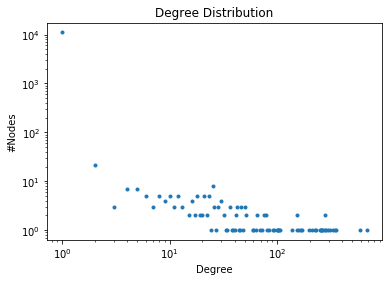

In [14]:
hist = nx.degree_histogram(g)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [6]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
G0 = g.subgraph(Gcc[0])

print(nx.info(G0))

Name: 
Type: Graph
Number of nodes: 9031
Number of edges: 9038
Average degree:   2.0016


In [9]:
nx.average_shortest_path_length(G0, weight= True)

10.622011177691999

In [9]:
bipartite.degrees(g, top_nodes)

(DegreeView({'20878711': 17, '40791472': 4, '1605387': 26, '4119684': 59, '3722301': 152, '4259933': 46, '1986095': 165, '18950531': 65, '4949644': 25, '2661450': 7, '20651079': 13, '14610348': 27, '2429334': 311, '21744543': 16, '24117588': 32, '33990484': 28, '9996040': 25, '4282415': 36, '21354405': 10, '12877936': 39, '3259374': 44, '30140860': 81, '12801514': 259, '13825291': 25, '19890254': 36, '7812608': 266, '1035801': 17, '26000561': 16, '17632137': 25, '730916': 354, '22026123': 12, '1321735': 65, '17859181': 24, '22566099': 152, '22092298': 21, '654931': 677, '15458166': 78, '15595655': 41, '39149225': 3, '17862359': 22, '24827860': 22, '32008398': 10, '14412610': 231, '24981353': 41, '29984774': 5, '14313251': 195, '8269677': 281, '8706862': 51, '19796378': 4, '2700366': 48, '23429851': 4, '11899719': 18, '29776071': 138, '3270897': 75, '23747999': 11, '759060': 101, '12475352': 78, '1230403': 30, '20321345': 51, '27863226': 92, '23819110': 18, '25992447': 4, '1924194': 13,

In [10]:
nx.is_connected(g)


False

In [11]:
bipartite.is_bipartite(g) 

True

In [12]:
cliques= nx.find_cliques(g)

In [13]:
list(community.k_clique_communities(g, 3))

[]

## Projection of the graph on review

usual approach for the analysis of bipartite graphs consists of deriving unipartite graphs (projections) from the underlying bipartite structure, which however is associated with important loss of information and data storage issues

In [6]:
def my_weight(G, u, v, weight="weight"):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G[u][nbr].get(weight, 1) + G[v][nbr].get(weight, 1)
    return w

In [7]:
G= bipartite.generic_weighted_projected_graph(g, list(top_nodes), weight_function=my_weight)

In [8]:
print(nx.info(G))
print(" Density : ", nx.density(G))
print(" Average Clustering : ", nx.average_clustering(G)) #measures in which grade the nodes tend to be connected between them
print(" Bridges : ", len(list(nx.bridges(G))))
print(" Number of connected components : ", nx.number_connected_components(G))

Name: 
Type: Graph
Number of nodes: 11110
Number of edges: 1260952
Average degree: 226.9941
 Density :  0.020433347682594347
 Average Clustering :  0.9980734491347705
 Bridges :  0
 Number of connected components :  9


In [21]:
nx.degree_assortativity_coefficient(G)

0.9445017662706234

In [9]:
Pgcc = sorted(nx.connected_components(G), key=len, reverse=True)
PG0 = G.subgraph(Pgcc[0])

print(nx.info(PG0))


Name: 
Type: Graph
Number of nodes: 8914
Number of edges: 1065117
Average degree: 238.9762


In [11]:
nx.is_connected(G)

False

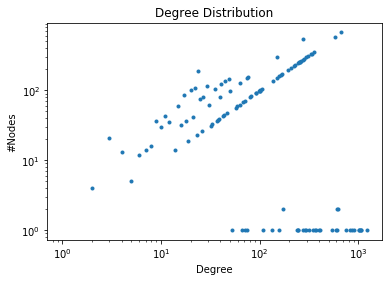

In [13]:
hist = nx.degree_histogram(G)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [12]:
#degree centrality: how many neighbour a node has? 
#since we have 11000 nodes i computed the mean
degrees = dict(G.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
a=0
for i in range (len(ranks)):
    a+= ranks[i][1]
mean=a/len(ranks)
mean

226.9940594059406

### Confronto con Watts-strogant

In [8]:
ws=nx.watts_strogatz_graph(11110, 227, 0.02, seed=None)

In [11]:
print(nx.info(ws))
print(" Density : ", nx.density(ws))
print(" Average Clustering : ", nx.average_clustering(ws)) #measures in which grade the nodes tend to be connected between them
print(" Bridges : ", len(list(nx.bridges(ws))))
print(" Number of connected components : ", nx.number_connected_components(ws))

Name: 
Type: Graph
Number of nodes: 11110
Number of edges: 1255430
Average degree: 226.0000
 Density :  0.020343865334413538
 Average Clustering :  0.7031474250904316
 Bridges :  0
 Number of connected components :  1


In [12]:
#degree centrality: how many neighbour a node has? 
#since we have 11000 nodes i computed the mean
degrees = dict(ws.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
a=0
for i in range (len(ranks)):
    a+= ranks[i][1]
mean=a/len(ranks)
mean

226.0

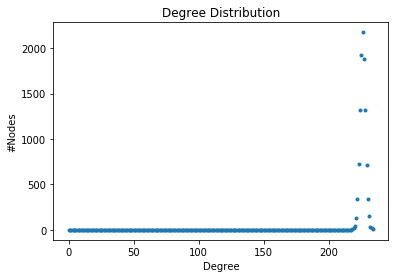

In [19]:
hist = nx.degree_histogram(ws)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

#### Confronto Barabasi

In [9]:
ba= nx.barabasi_albert_graph(11110, int(1260952/11110), seed=None)

In [17]:
print(nx.info(ba))
print(" Density : ", nx.density(ba))
print(" Average Clustering : ", nx.average_clustering(ba)) #measures in which grade the nodes tend to be connected between them
print(" Bridges : ", len(list(nx.bridges(ba))))
print(" Number of connected components : ", nx.number_connected_components(ba))
#print("Diameter : ", nx.diameter(ba, e=None, usebounds=False))
#print("Average path lenght : ", nx.average_shortest_path_length(ba))

Name: 
Type: Graph
Number of nodes: 11110
Number of edges: 1242661
Average degree: 223.7014
 Density :  0.020136947532182328
 Average Clustering :  0.057611747307760516
 Bridges :  0
 Number of connected components :  1


In [18]:
#degree centrality: how many neighbour a node has? 
#since we have 11000 nodes i computed the mean
degrees = dict(ba.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
a=0
for i in range (len(ranks)):
    a+= ranks[i][1]
mean=a/len(ranks)
mean

223.7013501350135

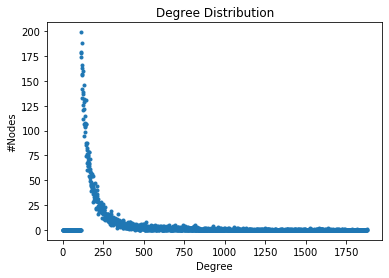

In [18]:
hist = nx.degree_histogram(ba)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

### ER

In [10]:
er = nx.erdos_renyi_graph(11110, 0.02)

Name: 
Type: Graph
Number of nodes: 11110
Number of edges: 1232920
Average degree: 221.9478
 Density :  0.019979097558689166
 Average Clustering :  0.020004019665264175
 Bridges :  0
 Number of connected components :  1


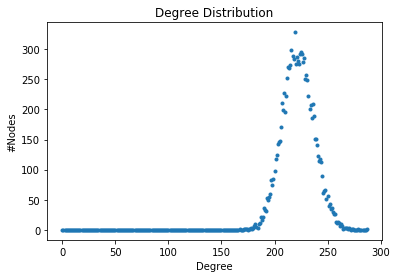

In [21]:
print(nx.info(er))
print(" Density : ", nx.density(er))
print(" Average Clustering : ", nx.average_clustering(er)) #measures in which grade the nodes tend to be connected between them
print(" Bridges : ", len(list(nx.bridges(er))))
print(" Number of connected components : ", nx.number_connected_components(er))
hist = nx.degree_histogram(er)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

In [ ]:
#degree centrality: how many neighbour a node has? 
#since we have 11000 nodes i computed the mean
degrees = dict(er.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
a=0
for i in range (len(ranks)):
    a+= ranks[i][1]
mean=a/len(ranks)
mean

### Confronto con configuration model

In [11]:
sequence = [i[1] for i in G.degree()]

cm = nx.configuration_model(sequence)

Name: 
Type: MultiGraph
Number of nodes: 11110
Number of edges: 1260952
Average degree: 226.9941
 Density :  0.020433347682594347
 Number of connected components :  1


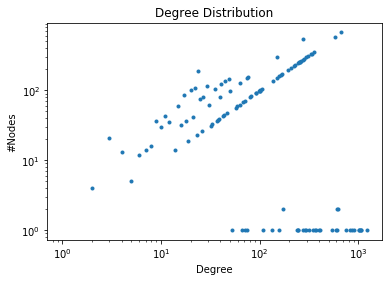

In [29]:
print(nx.info(cm))
print(" Density : ", nx.density(cm))
#print(" Average Clustering : ", nx.average_clustering(cm)) #measures in which grade the nodes tend to be connected between them
#print(" Bridges : ", len(list(nx.bridges(cm))))
print(" Number of connected components : ", nx.number_connected_components(cm))
hist = nx.degree_histogram(cm)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

plt.show()

In [30]:
#degree centrality: how many neighbour a node has? 
#since we have 11000 nodes i computed the mean
degrees = dict(cm.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
a=0
for i in range (len(ranks)):
    a+= ranks[i][1]
mean=a/len(ranks)
mean

226.9940594059406

## Degree distribution of articificial networks

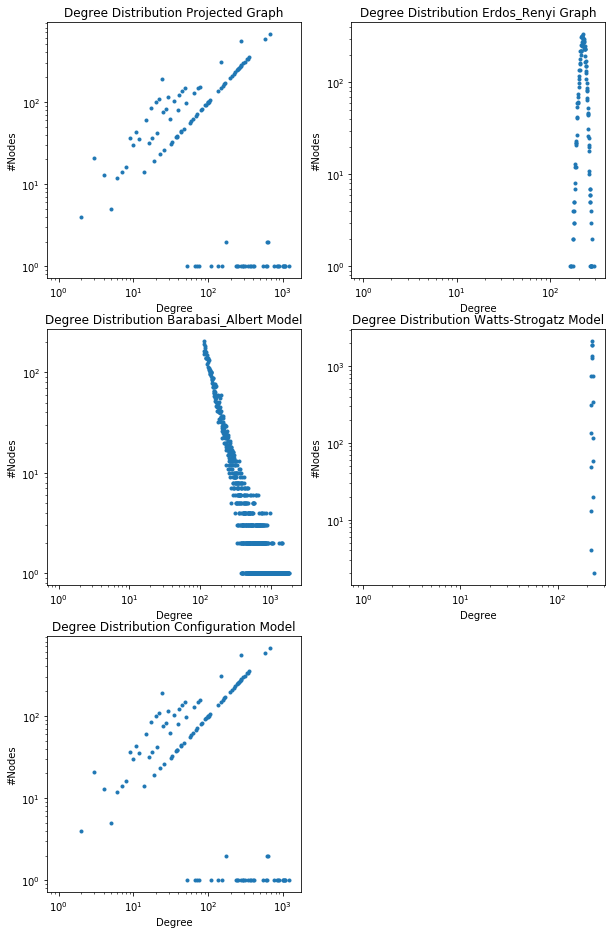

In [12]:
hist = nx.degree_histogram(G)
hist_er = nx.degree_histogram(er)
hist_ba = nx.degree_histogram(ba)
hist_ws = nx.degree_histogram(ws)
hist_cm= nx.degree_histogram(cm)

fig = plt.figure(figsize=(10,16) )

plt.subplot(3,2,1)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution Projected Graph")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

plt.subplot(3,2,2)
plt.plot(range(0, len(hist_er)), hist_er, ".")
plt.title("Degree Distribution Erdos_Renyi Graph")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()


plt.subplot(3,2,3)
plt.plot(range(0, len(hist_ba)), hist_ba, ".")
plt.title("Degree Distribution Barabasi_Albert Model")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()



plt.subplot(3,2,4)
plt.plot(range(0, len(hist_ws)), hist_ws, ".")
plt.title("Degree Distribution Watts-Strogatz Model")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()


plt.subplot(3,2,5)
plt.plot(range(0, len(hist_cm)), hist_cm, ".")
plt.title("Degree Distribution Configuration Model")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()


plt.show()